In [1]:
# %matplotlib notebook

In [2]:

# import dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
import json
from scipy.stats import linregress
college_df = pd.read_csv("college_app_data.csv", encoding="utf-8")
college_df

,College_names,Year,applicants_total,applicants_men,applicants_women,admissions_total,admissions_men,admissions_women
0,Arizona State University-Tempe,2018,26869,14256,12613,22779,11826,10953
1,Oregon State University,2018,14890,7212,7678,12006,5642,6364
2,Stanford University,2018,47452,24692,22760,2071,1048,1023
3,University of Arizona,2018,39941,17715,22223,33717,14786,18928
4,University of California-Berkeley,2018,89607,43552,46055,13301,5585,7716
...,...,...,...,...,...,...,...,...
211,University of Oregon,2001,8107,3626,4481,7305,3189,4116
212,University of Southern California,2001,26351,12172,14179,8973,4245,4728
213,University of Utah,2001,5926,3028,2898,5392,2728,2664
214,University of Washington-Seattle Campus,2001,14664,7002,7662,11523,5303,6220


In [9]:
college_df['percent_apps_women'] = college_df['applicants_women']/college_df['applicants_total']
college_df['percent_admissions_women'] = college_df['admissions_women']/college_df['admissions_total']

In [10]:
college_df

,College_names,Year,applicants_total,applicants_men,applicants_women,admissions_total,admissions_men,admissions_women,percent_apps_women,percent_admissions_women
0,Arizona State University-Tempe,2018,26869,14256,12613,22779,11826,10953,0.469426,0.480838
1,Oregon State University,2018,14890,7212,7678,12006,5642,6364,0.515648,0.530068
2,Stanford University,2018,47452,24692,22760,2071,1048,1023,0.479643,0.493964
3,University of Arizona,2018,39941,17715,22223,33717,14786,18928,0.556396,0.561379
4,University of California-Berkeley,2018,89607,43552,46055,13301,5585,7716,0.513967,0.580107
...,...,...,...,...,...,...,...,...,...,...
211,University of Oregon,2001,8107,3626,4481,7305,3189,4116,0.552732,0.563450
212,University of Southern California,2001,26351,12172,14179,8973,4245,4728,0.538082,0.526914
213,University of Utah,2001,5926,3028,2898,5392,2728,2664,0.489031,0.494065
214,University of Washington-Seattle Campus,2001,14664,7002,7662,11523,5303,6220,0.522504,0.539790


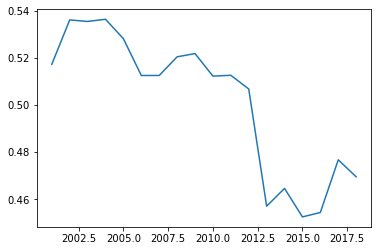

In [5]:
grouped_df = college_df.groupby(['College_names'])
asu = college_df.loc[college_df['College_names'] == 'Arizona State University-Tempe']

x_values = asu['Year']
y_values = asu['percent_apps_women']
plt.plot(x_values, y_values)
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# plt.plot(x_values,regress_values,"r-")
plt.show()


In [15]:
WSU = college_df.loc[college_df["College_names"] == 'Washington State University']
ASU = college_df.loc[college_df["College_names"] == 'Arizona State University-Tempe']
UCLA = college_df.loc[college_df["College_names"] == 'University of California-Los Angeles']
Stanford = college_df.loc[college_df["College_names"] == 'Stanford University']
UofA = college_df.loc[college_df["College_names"] == 'University of Arizona']
Berkeley = college_df.loc[college_df["College_names"] == 'University of California-Berkeley']
UCBoulder = college_df.loc[college_df["College_names"] == 'University of Colorado Boulder']
USC = college_df.loc[college_df["College_names"] == 'University of Southern California']
UW = college_df.loc[college_df["College_names"] == 'University of Washington-Seattle Campus']
OSU = college_df.loc[college_df["College_names"] == 'Oregon State University']
UofO = college_df.loc[college_df["College_names"] == 'University of Oregon']
UofU = college_df.loc[college_df["College_names"] == 'University of Utah']

school_data = [WSU, ASU, UCLA, Stanford, UofA, Berkeley, UCBoulder, USC, UW, OSU, UofO, UofU]

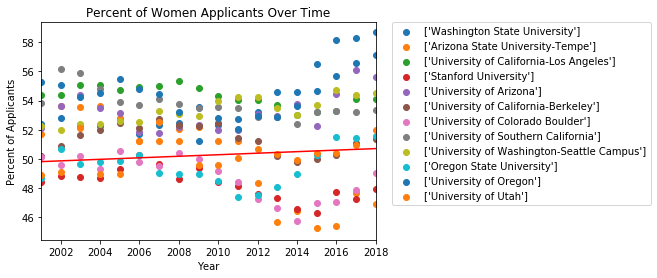

In [22]:
for school in school_data:
        x_values = school['Year']
        y_values = school['percent_apps_women']*100
        plt.scatter(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Percent of Women Applicants Over Time")
plt.xlabel("Year")
plt.ylabel("Percent of Applicants")
plt.xlim(min(x_values),max(x_values))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.show()

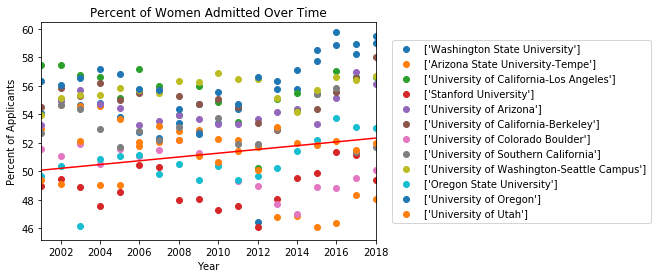

The correlation coefficient is: 0.5228159052066632
The slope of the best fit line is: 0.13246572274856322


In [35]:
for school in school_data:
        x_values = school['Year']
        y_values = school['percent_admissions_women']*100
        plt.scatter(x_values, y_values, label=school['College_names'].unique())
        plt.legend(bbox_to_anchor=(1.05, .92), loc='upper left', borderaxespad=0.)
plt.title("Percent of Women Admitted Over Time")
plt.xlabel("Year")
plt.ylabel("Percent of Applicants")
plt.xlim(min(x_values),max(x_values))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The correlation coefficient is: {rvalue}")
print(f"The slope of the best fit line is: {slope}")


In [23]:
UofO

,College_names,Year,applicants_total,applicants_men,applicants_women,admissions_total,admissions_men,admissions_women,percent_apps_women,percent_admissions_women
7,University of Oregon,2018,24474,10496,13978,20404,8364,12040,0.571137,0.590080
19,University of Oregon,2017,20317,8820,11497,16824,7024,9800,0.565881,0.582501
31,University of Oregon,2016,21821,9665,12156,16992,6990,10002,0.557078,0.588630
43,University of Oregon,2015,22000,9970,12030,16328,6771,9557,0.546818,0.585314
55,University of Oregon,2014,21359,9909,11450,15997,6862,9135,0.536074,0.571045
67,University of Oregon,2013,21263,10015,11248,15770,6884,8886,0.528994,0.563475
79,University of Oregon,2012,23012,10826,12186,16790,7279,9511,0.529550,0.566468
91,University of Oregon,2011,18515,8874,9641,14588,6608,7980,0.520713,0.547025
103,University of Oregon,2010,16780,7914,8866,13367,5937,7430,0.528367,0.555846
115,University of Oregon,2009,15013,7320,7693,12801,6067,6734,0.512423,0.526053
